# ECE 795 - Big Data
## Homework_5_part1 - Querying Google Cloud BigQuery using SQL


### Before you begin


1.   Create your own project using using the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project. (should be already enabled)
  

### Provide your credentials to the runtime

In [0]:
# Authenticate your student profile

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

### Set the Project ID 

In [0]:
project_id = 'ECE795'

## Example Task


### We will use the GSOD sample table contains weather information collected by NOAA, such as precipitation amounts and wind speeds from late 1929 to early 2010.

### You can access BigQuery table via Google-cloud-bigQuery API.

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.samples.gsod`''').to_dataframe().total[0]


print('Full dataset has %d rows' % row_count)

### Return total row count and first 2000 rows from the Table

In [0]:
# Using Google Cloud method

from google.cloud import bigquery

client = bigquery.Client(project=project_id)

row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.samples.gsod`''').to_dataframe().total[0]

df_gc = client.query('''
  SELECT
    *
  FROM
    `bigquery-public-data.samples.gsod`
  LIMIT 2000
''' ).to_dataframe()

# top 10 rows
df_gc.head(10)


### Describe the data in statistical method using GCloud *method*

In [0]:
df_gc.describe()

### 10 highest total_precipitation samples


In [0]:
df_gc.sort_values('total_precipitation', ascending=False).head(10)[['station_number', 'year', 'month', 'day', 'total_precipitation']]

# Sample code for USA SSN data
### This public dataset was created by the Social Security Administration and contains all names from Social Security card applications for births that occurred in the United States after 1879. 

In [0]:
import pandas as pd

sample_count = 2000
df = pd.io.gbq.read_gbq('''
  SELECT name, SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''', project_id=project_id, verbose=False, dialect='standard')

df.head()

# Assignment
### Use the Google Political Advertisement analytics dataset to answer the following questions
### This data set contains information on how much is spent by verified advertisers on political advertising across Google Ad Services. In addition, insights on demographic targeting used in political ad campaigns by these advertisers are also provided, as are links to the actual political ad in the Google Transparency report.
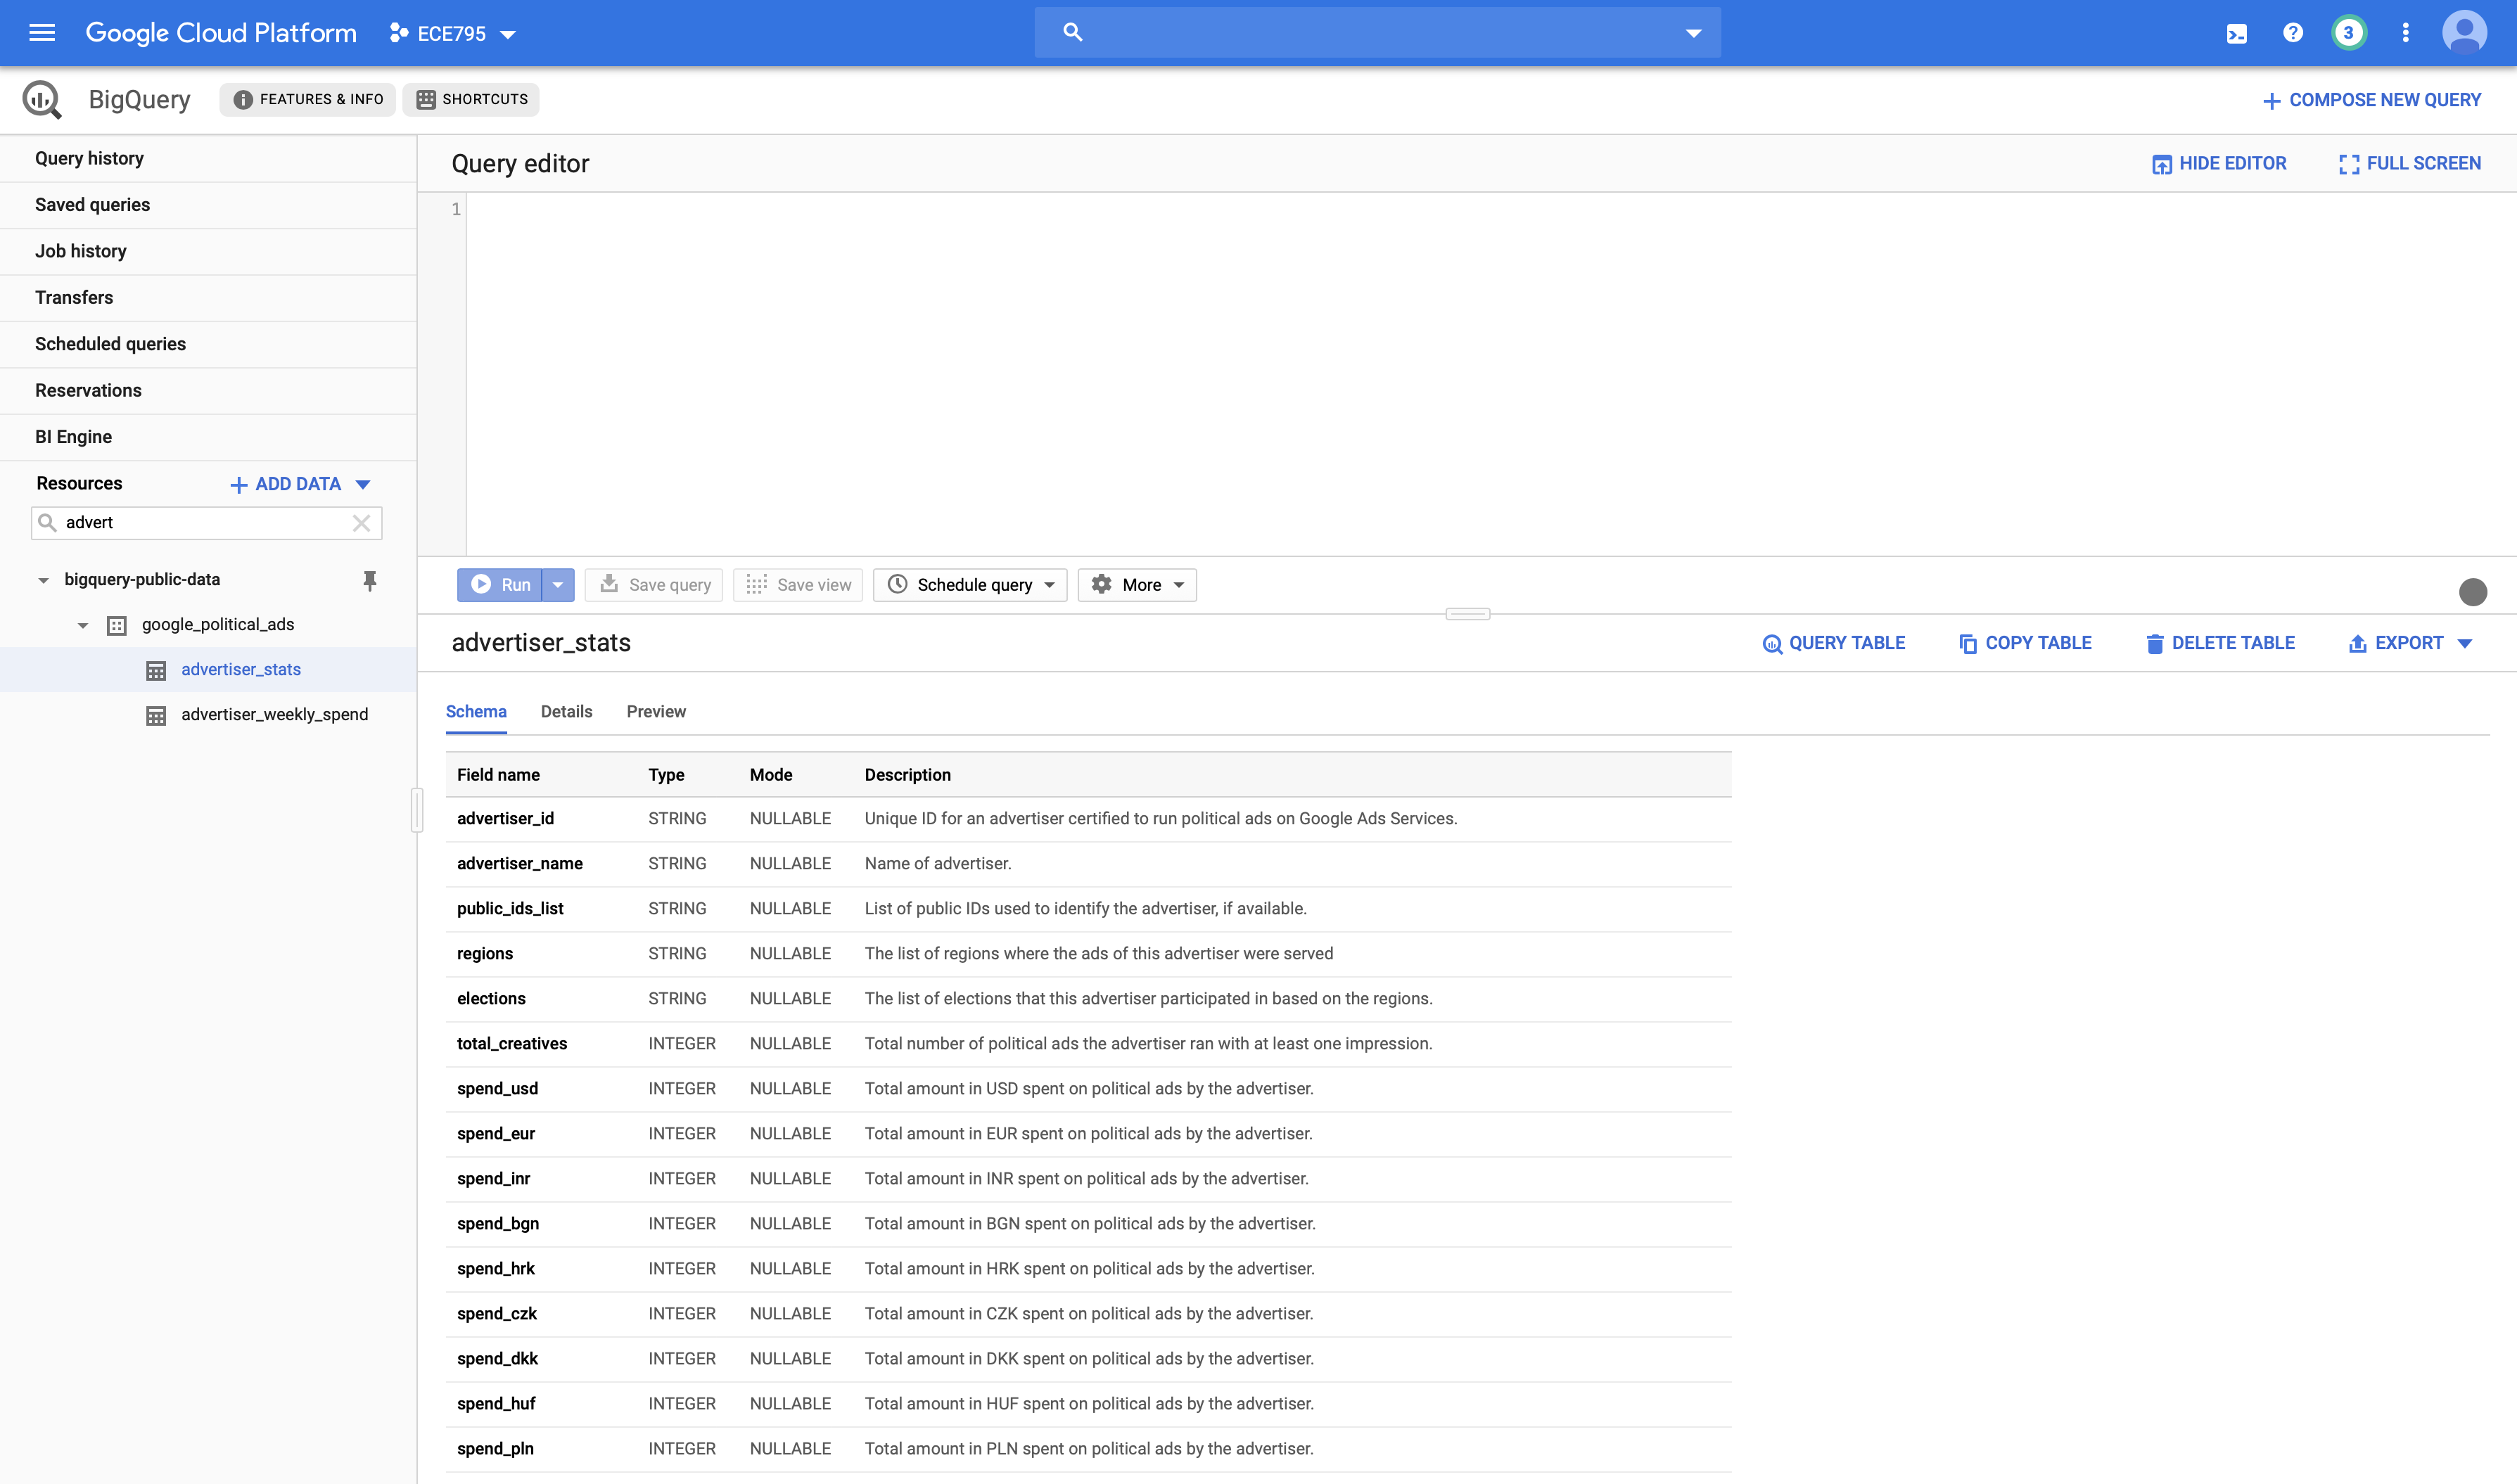


### # Question 1. From the 'advertiser_stats' table, list the top 20 advertisers and sort them by their total spending in USD 


In [0]:
# your code here

#### Question 2. From the 'geo spend' table, list the top 10 states by their total spending in USD

In [0]:
# your code here

#### Question 3. From the 'creative_stats' table, which advertiser had their ads running for the most number of days during the years 2016 and 2017

In [0]:
# your code here

#### Question 4. From the 'campaign_targeting' table, list the top 5 advertisers who target younger population (18-24, 25-34, 35-44)

In [0]:
# your code here

#### Question 5. from the advertiser_stats, list the heaviest spending advertiser by calculating total_spending divided by total_creatives. For this you need to divide the total_spend_usd / total_creatives to get a ratio of their spending per ad. Sort the list and show only the top 10. 

In [0]:
# your code here